<a href="https://colab.research.google.com/github/asafe-eduardo/colab/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTS 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) #default size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [0]:
def load_data(data_dir):
  train_data = open(data_dir + "train.csv").read()
  train_data = train_data.split("\n")[1:-1]
  train_data = [i.split(",") for i in train_data]
  
  X_train = np.array([[int(i[j]) for j in range(1, len(i))] for i in train_data])
  y_train = np.array([int(i[0]) for i in train_data])
  
  test_data = open(data_dir + "test.csv").read()
  test_data = test_data.split("\n")[1:-1]
  test_data = [i.split(",") for i in test_data]
  
  X_test = np.array([[int(i[j]) for j in range(0,len(i))] for i in test_data])

  return X_train, y_train, X_test

In [0]:
class simple_knn():
  def __init__(self):
    pass
  
  def train(self, X, y):
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1):
    dists = self.compute_distances(X)
    
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    
    for i in range(num_test):
      k_closest_y = []
      labels = self.y_train[np.argsort(dists[i, :])].flatten()
      
      k_closest_y = labels[:k]
      
      c = Counter(k_closest_y)
      y_pred[i] = c.most_common(1)[0][0]
    return(y_pred)



  def compute_distances(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    
    dot_pro = np.dot(X, self.X_train.T)
    sum_square_test = np.square(X).sum(axis = 1)
    sum_square_train = np.square(self.X_train).sum(axis = 1)
    dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)
    
    return(dists)
      
  

In [0]:
X_train, y_train, X_test = load_data("")

In [7]:
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


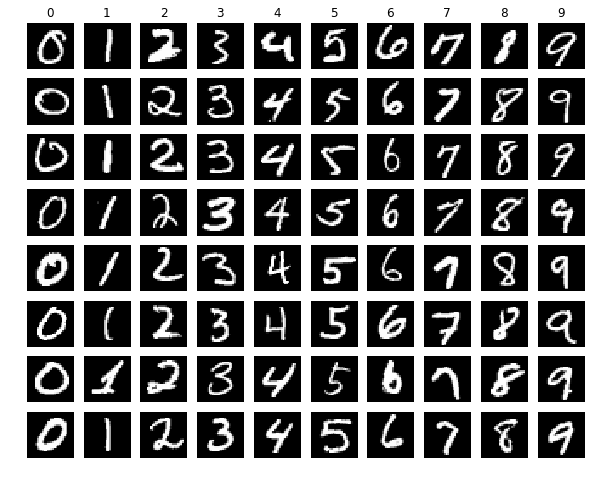

In [8]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(classes)
samples = 8

for y, cls in enumerate(classes):
  idxs = np.nonzero([i == y for i in y_train])
  idxs = np.random.choice(idxs[0], samples, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + y + 1
    plt.subplot(samples, num_classes, plt_idx)
    plt.imshow(X_train[idx].reshape((28,28)))
    plt.axis("off")
    if i == 0:
      plt.title(cls)
      
plt.show()

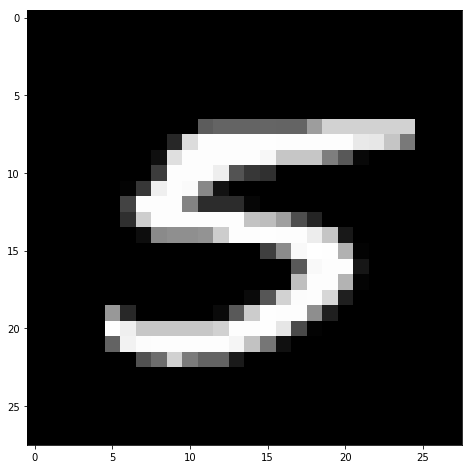

In [9]:
plt.imshow(X_test[2311].reshape((28, 28)))

In [0]:
batch_size = 2000
k = 1
classifier = simple_knn()
classifier.train(X_train, y_train)

In [11]:
predictions = []

for i in range(int(len(X_test)/(2*batch_size))):
  print("Computing batch " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
  tic = time.time()
  predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
  toc = time.time()
  predictions = predictions + list(predts)
  print("Completed this batch in " + str(toc-tic) + " Secs.")
  
print("Completed predicting the test data.")

Computing batch 1/14...
Completed this batch in 121.91196703910828 Secs.
Computing batch 2/14...
Completed this batch in 118.14384722709656 Secs.
Computing batch 3/14...
Completed this batch in 118.58649444580078 Secs.
Computing batch 4/14...
Completed this batch in 118.47648000717163 Secs.
Computing batch 5/14...
Completed this batch in 118.51863598823547 Secs.
Computing batch 6/14...
Completed this batch in 118.37703227996826 Secs.
Computing batch 7/14...
Completed this batch in 118.13646197319031 Secs.
Completed predicting the test data.


In [12]:
for i in range(int(len(X_test)/(2*batch_size)), int(len(X_test)/batch_size)):
    print("Computing batch " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    toc = time.time()

print("Completed predicting the test data.")
print("Completed this batch in " + str(toc-tic) + " Secs.")


Computing batch 8/14...
Computing batch 9/14...
Computing batch 10/14...
Computing batch 11/14...
Computing batch 12/14...
Computing batch 13/14...
Computing batch 14/14...
Completed predicting the test data.
Completed this batch in 2.384185791015625e-07 Secs.


In [0]:
out_file = open("predictions.csv", "w")
out_file.write("ImageId, Label\n")
for i in range(len(predictions)):
  out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()